In [1]:
import re 
import random
import pandas as pd
import numpy as np
import math
from plotnine import *
import matplotlib.pyplot as plt

# WebScraping

In [59]:
import requests
from lxml import etree
import re 
import random
import pandas
import json
import time
from fake_useragent import UserAgent
import pandas as pd
import numpy as np

In [ ]:
cocktail_data = pd.DataFrame(columns=["Name","Composiion",'Price'])

url = 'https://thealchemist.uk.com/drinks/london-bevis-marks/'
req = requests.get(url,headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.1823.37',
                               'Cookie':'CookieConsent={stamp:%27/ISFdReTZKez3DdVOrIcVochMcWTtag50rHoAkbh7uy8B25I397kSQ==%27%2Cnecessary:true%2Cpreferences:true%2Cstatistics:true%2Cmarketing:true%2Cmethod:%27explicit%27%2Cver:1%2Cutc:1685871048276%2Cregion:%27cn%27}'})
html = etree.HTML(req.text)
menu_list = html.xpath('//ul[@class="items"]')

li_list = list(map(lambda x:x.xpath("./li[@class='item']"),menu_list))
name = list(map(lambda li:li.xpath("./div[1]//h3/text()")[0],li_list))
price = list(map(lambda li:li.xpath("./div[1]//span/text()")[0],li_list))
Comp = list(map(lambda li:li.xpath("./div[2]//p/text()")[0],li_list))
map(lambda x,y,z:cocktail_data.loc[len(cocktail_data)] = [x,y,z],name,price,Comp)
       
cocktail_data

In [19]:
list(map(lambda x,y,z:x+y+z,[1],[2],[3]))

[6]

# Data Cleanning

In [94]:
data= pd.read_excel("E:/cocktail_data.xlsx")
data.drop_duplicates(inplace = True,ignore_index = True)
data

,Name,Composition,Price,Description
0,STRAWBERRY SBAGLIATO,"Oooh stunning! Campari, Martini Rosso, strawbe...",NaN,NaN
1,PINEAPPLE MEZCALITA,"Havana Club Cuban Spiced rum, Montelobos Mezca...",NaN,NaN
2,TOMMY'S MARGARITA,The classic Tommy’s with El Jimador Blanco teq...,NaN,NaN
3,CONSCIOUS COSMO,Our sustainable Cosmopolitan made with Discard...,NaN,NaN
4,SPICED RUM PUNCH,"Bacardí Añejo Cuatro, Bacardí spiced rum, pine...",NaN,NaN
...,...,...,...,...
73,BEASY OLD FASHIONED,"Coffee infused Bourbon, bitters, sugar syrup",12,NaN
74,PORNSTAR MARTINI,"Vanilla vodka, tropical liquor, pineapple juic...",12.5,NaN
75,BEASY SPICY MARGARITA,"Tequila infused with Jalapenos, lime juice, se...",12.5,NaN
76,COSMOPOLITAN,"Vodka, Orange Liquor, Cranberry Juice, Lime Juice",12,NaN


In [95]:
price_data = data.loc[data.Price.notna(),:]

In [96]:
price_data["Price"] = price_data["Price"].astype("float32")

c:\Temp\ipykernel_16704\1408133141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Data Visualization

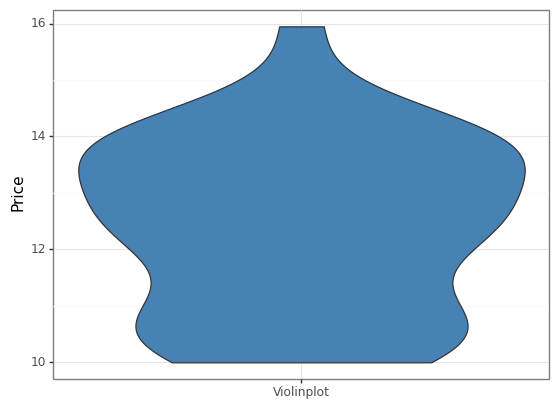

<ggplot: (120753443711)>

In [97]:
# Price
(ggplot(price_data,aes(x=["Violinplot"] * len(price_data),y='Price'))+
    geom_violin(fill='steelblue')+
    theme_bw()
)

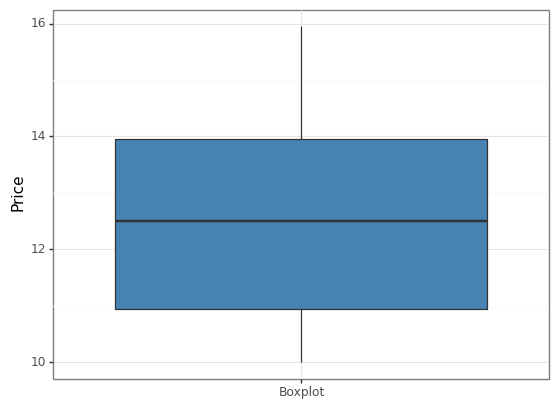

<ggplot: (120753442940)>

In [98]:
(ggplot(price_data,aes(x=["Boxplot"] * len(price_data),y='Price'))+
    geom_boxplot(fill='steelblue')+
    theme_bw()
)

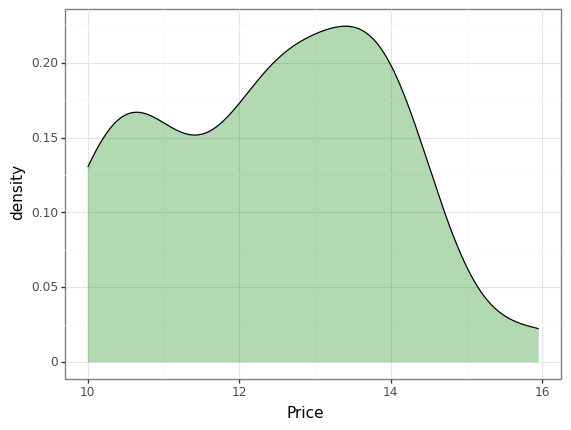

<ggplot: (120753454747)>

In [99]:
(ggplot(price_data,aes(x='Price'))+
    geom_density(fill='green',alpha=0.3)+
    theme_bw()
)

In [100]:
#Composition
Comp_text = ' '.join(list(data.Composition))
Comp_text

"Oooh stunning! Campari, Martini Rosso, strawberry syrup and Prosecco. Havana Club Cuban Spiced rum, Montelobos Mezcal, pineapple juice, tabasco and lime juice – a bartender fave! The classic Tommy’s with El Jimador Blanco tequila, agave and lime mix and sea salt.\xa0\xa0 Our sustainable Cosmopolitan made with Discarded Grape Skin vodka (made from discarded grape skins), Cointreau, lime and cranberry juice. Bacardí Añejo Cuatro, Bacardí spiced rum, pineapple juice and strawberry syrup. MOOSE Peach Botanical spirit, Prosecco and Fever- Tree White Grape & Apricot Soda. Every bottle of MOOSE sold plants Three with The Sumatran Orangutan Society. Aperol, Prosecco and soda – the iconic Italian drink. Salute! A classy vodka-based cocktail with Cîroc Pineapple vodka, Chambord raspberry liqueur and pineapple juice. Bacardi Carta Blanca rum, fresh mint, fresh lime, sugar syrup and soda. Koko Kanu rum, Havana Especial rum, lime, coconut milk and pineapple juice. Ketel One vodka, Bombay Sapphire 

In [102]:
import nltk.tokenize as tk


# Split words by text punctuation divider
punctTokenizer = tk.WordPunctTokenizer()
word_list = punctTokenizer.tokenize(Comp_text)
Word_text = list(filter(lambda x:x not in [',','.','!','-',';','?',"'",'&','),',"(",")","’",":"],word_list))
wc_text = ' '.join(Word_text)
wc_text

'Oooh stunning Campari Martini Rosso strawberry syrup and Prosecco Havana Club Cuban Spiced rum Montelobos Mezcal pineapple juice tabasco and lime juice – a bartender fave The classic Tommy s with El Jimador Blanco tequila agave and lime mix and sea salt Our sustainable Cosmopolitan made with Discarded Grape Skin vodka made from discarded grape skins Cointreau lime and cranberry juice Bacardí Añejo Cuatro Bacardí spiced rum pineapple juice and strawberry syrup MOOSE Peach Botanical spirit Prosecco and Fever Tree White Grape Apricot Soda Every bottle of MOOSE sold plants Three with The Sumatran Orangutan Society Aperol Prosecco and soda – the iconic Italian drink Salute A classy vodka based cocktail with Cîroc Pineapple vodka Chambord raspberry liqueur and pineapple juice Bacardi Carta Blanca rum fresh mint fresh lime sugar syrup and soda Koko Kanu rum Havana Especial rum lime coconut milk and pineapple juice Ketel One vodka Bombay Sapphire gin Olmeca tequila Bacardi Carta Blanca rum Co

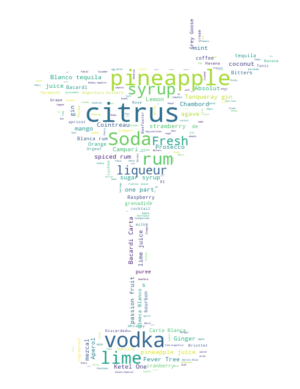

In [123]:
import wordcloud
from PIL import Image

img = Image.open('E:/cocktail1.jpg') #Open the picture
img_array = np.array(img) #Convert the image to an array

wc = wordcloud.WordCloud(
    background_color='white',
    width=2000,
    height=1500,
    scale=2,
    min_font_size=1,
    mask=img_array #Set the background picture
    #font_path=font,
)
wc.generate(wc_text)

plt.imshow(wc, interpolation='bilinear')# Show the picture with plt
plt.axis("off")  # Do not show coordinate axes
plt.show() # Show the picture

wc.to_file("E:/cocktail_result.jpg")

# The relationship between price and type

In [38]:
type_data = pd.read_excel("E:/Bar-Menu-Price-List-2021.xlsx")
type_data

,Name,Composition,Price,Type
0,Pornstar Martini ...,"Vanilla vodka, Passoa, Lime Juice, Pineapple J...",8.75,Modern Cocktail’s
1,Espresso Martini ...,"Vodka, Coffee Liqueur, Fresh Coffee, Simple Syrup",8.75,Modern Cocktail’s
2,Pimm’s Cup ...,"Pimm’s, Strawberries, Cucumber, Lemonade, Mint,",8.75,Modern Cocktail’s
3,Superfruit Mojito ...,"White Rum, Blueberries, Raspberries, Fresh Lim...",8.75,Modern Cocktail’s
4,Long Island Ice Tea ...,"Vodka, Orange Liqueur, White Rum, Tequila, Gin...",8.75,Modern Cocktail’s
...,...,...,...,...
74,Cazcabel Coffee,NaN,4.25,Tequila’s
75,Cazcabel Honey,NaN,4.25,Tequila’s
76,Cazcabel Reposado,NaN,4.25,Tequila’s
77,Patron Silver,NaN,4.25,Tequila’s


In [64]:
type_data.groupby("Type").describe()

Price                                                  \
                     count       mean       std   min    25%    50%    75%   
Type                                                                         
Brandy’s               1.0   3.250000       NaN  3.25   3.25   3.25   3.25   
Champagne Cocktail’s   7.0  10.392857  0.944911  8.25  10.75  10.75  10.75   
Gin Cup Cocktail’s     6.0   9.250000  0.000000  9.25   9.25   9.25   9.25   
Liquors                9.0   3.222222  0.150231  3.00   3.25   3.25   3.25   
Mocktail’s             4.0   3.500000  0.000000  3.50   3.50   3.50   3.50   
Modern Cocktail’s      9.0   8.527778  0.263523  8.25   8.25   8.75   8.75   
Premium Cocktail’s     5.0   9.250000  0.000000  9.25   9.25   9.25   9.25   
Prosecco Cocktail’s    8.0   9.250000  0.000000  9.25   9.25   9.25   9.25   
Shots                  6.0   3.333333  0.516398  3.00   3.00   3.00   3.75   
Tequila’s              9.0   3.833333  0.572822  3.00   3.25   4.25   4.25   
Whiskey/Bourbon’s      5.0   3.500000  0.306186  3.25   3.25   3.50   3.50   
 Classic Cocktail’s   10.0   8.250000  0.000000  8.25   8.25   8.25   8.25   

                             
                        max  
Type                         
Brandy’s               3.25  
Champagne Cocktail’s  10.75  
Gin Cup Cocktail’s     9.25  
Liquors                3.50  
Mocktail’s             3.50  
Modern Cocktail’s      8.75  
Premium Cocktail’s     9.25  
Prosecco Cocktail’s    9.25  
Shots                  4.00  
Tequila’s              4.25  
Whiskey/Bourbon’s      4.00  
 Classic Cocktail’s    8.25

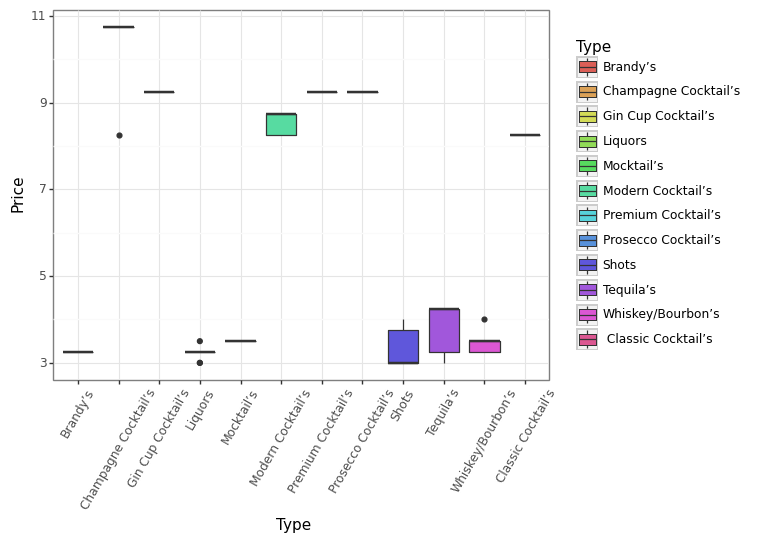

<ggplot: (120747228088)>

In [24]:
(ggplot(type_data,aes(x='Type',y='Price',fill='Type'))+
    geom_boxplot()+
    theme_bw()+
    theme(axis_text_x=element_text(angle=60))
)

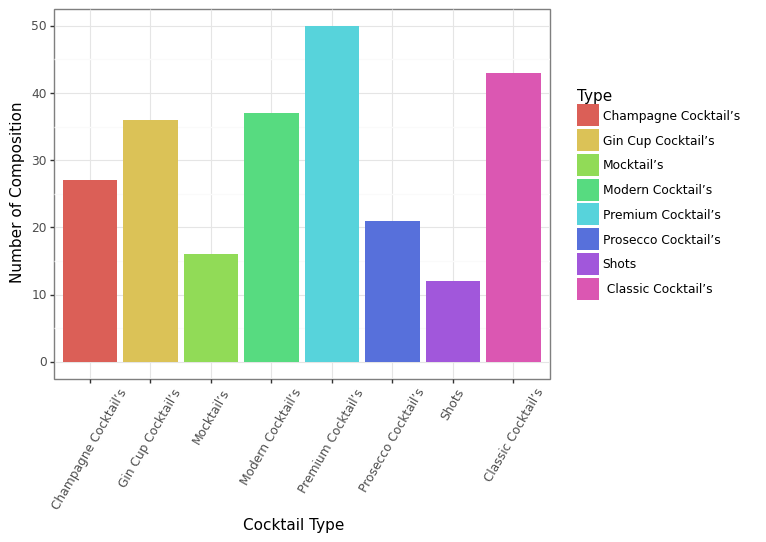

<ggplot: (120754991345)>

In [131]:
import nltk.tokenize as tk

type_com_data = type_data.dropna(subset=['Composition'],axis=0)

def split_count(t):
    text = ' '.join(list(t))
    # Split words by text punctuation divider
    punctTokenizer = tk.WordPunctTokenizer()
    word_list = punctTokenizer.tokenize(text)
    Word_text = list(filter(lambda x:x not in [',','.','!','-',';','?',"'",'&','),',"(",")","’",":"],
                            word_list))

    count_text = len(pd.value_counts(Word_text).tolist())
    return count_text

Type = type_com_data.groupby("Type")['Composition'].aggregate(split_count).index.tolist()
Num = type_com_data.groupby("Type")['Composition'].aggregate(split_count).to_list()
num_type_data = pd.DataFrame({'Type':Type,'Num':Num})


(ggplot(num_type_data,aes(x='Type',y='Num',fill='Type'))+
    geom_bar(stat='identity')+
    labs(x='Cocktail Type',y='Number of Composition')+
    theme_bw()+
    theme(axis_text_x=element_text(angle=60))
)

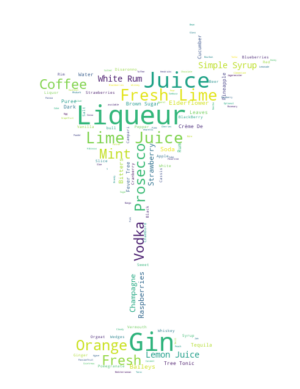

In [129]:
#Composition
Comp_text = ' '.join(list(type_com_data.Composition))
# Split words by text punctuation divider
punctTokenizer = tk.WordPunctTokenizer()
word_list = punctTokenizer.tokenize(Comp_text)
Word_text = list(filter(lambda x:x not in [',','.','!','-',';','?',"'",'&','),',"(",")","’",":"],word_list))
wc_text = ' '.join(Word_text)

import wordcloud
from PIL import Image

img = Image.open('E:/cocktail1.jpg') #Open the picture
img_array = np.array(img) #Convert the image to an array

wc = wordcloud.WordCloud(
    background_color='white',
    width=2000,
    height=1500,
    scale=2,
    min_font_size=1,
    mask=img_array #Set the background picture
    #font_path=font,
)
wc.generate(wc_text)

plt.imshow(wc, interpolation='bilinear')# Show the picture with plt
plt.axis("off")  # Do not show coordinate axes
plt.show() # Show the picture

wc.to_file("E:/cocktail_type.jpg")